Aperçu du dataset :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

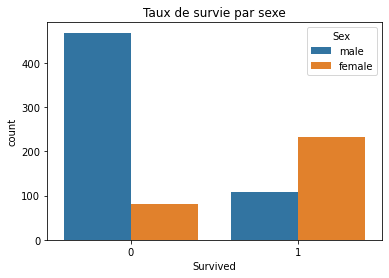


Dataset préparé :
   Survived  Pclass   Age     Fare  Sex_male
0         0       3  22.0   7.2500         1
1         1       1  38.0  71.2833         0
2         1       3  26.0   7.9250         0
3         1       1  35.0  53.1000         0
4         0       3  35.0   8.0500         1

Précision du modèle : 0.7988826815642458

Rapport de classification :
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



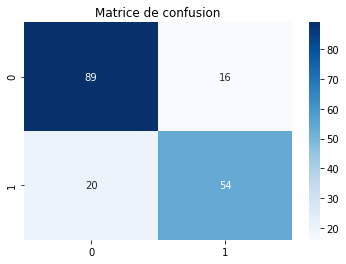

In [1]:
# ====== 1. Import des librairies ======
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ====== 2. Charger le dataset ======
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Aperçu du dataset :")
print(df.head())

# ====== 3. Analyse rapide ======
print("\nInfos sur le dataset :")
print(df.info())

# Visualisation : Survie en fonction du sexe
sns.countplot(x="Survived", hue="Sex", data=df)
plt.title("Taux de survie par sexe")
plt.show()

# ====== 4. Préparation des données ======
# Garder seulement certaines colonnes utiles
df = df[["Survived", "Pclass", "Sex", "Age", "Fare"]]

# Gestion des valeurs manquantes
df["Age"].fillna(df["Age"].median(), inplace=True)

# Encodage des variables catégorielles
df = pd.get_dummies(df, drop_first=True)

print("\nDataset préparé :")
print(df.head())

# ====== 5. Séparation train/test ======
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====== 6. Modélisation ======
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ====== 7. Évaluation ======
y_pred = model.predict(X_test)

print("\nPrécision du modèle :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

# Matrice de confusion
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion")
plt.show()
